# Library

In [1]:
#Basic
import pandas as pd
import numpy as np

#Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocess
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Evaluasi
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Ignore Warning
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

# Underfitting and Overfitting : KNN
## Dataset : Bank Loan

In [2]:
bankloan = pd.read_csv('bankloan.csv')
bankloan

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


In [3]:
bankloan['default'].value_counts()

0    517
1    183
Name: default, dtype: int64

In [4]:
fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

In [5]:
X = bankloan[fitur]
Y = bankloan[target]

# Train Test Split

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split (
    X,
    Y,
    stratify = Y,
    test_size = 0.2,
    random_state = 1996
)

# Standardization Process

In [7]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_Scaled = scaler.transform(X_train)
X_test_Scaled = scaler.transform(X_test)

# Selection Process of factor K

In [13]:
k = range(1,100,2)
testing_accuracies = []
train_accuracies = []
score = 0

for i in k :
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_Scaled, Y_train)

    y_predict_train = knn.predict(X_train_Scaled)
    train_accuracies.append(accuracy_score(Y_train, y_predict_train))

    y_predict_test = knn.predict(X_test_Scaled)
    acc_score = accuracy_score(Y_test,y_predict_test)
    testing_accuracies.append(acc_score)
    
    if score < acc_score :
        score = acc_score
        best_k = i

In [18]:
?plt.axvline

Signature: plt.axvline(x=0, ymin=0, ymax=1, **kwargs)
Docstring:
Add a vertical line across the Axes.

Parameters
----------
x : float, default: 0
    x position in data coordinates of the vertical line.

ymin : float, default: 0
    Should be between 0 and 1, 0 being the bottom of the plot, 1 the
    top of the plot.

ymax : float, default: 1
    Should be between 0 and 1, 0 being the bottom of the plot, 1 the
    top of the plot.

Returns
-------
`~matplotlib.lines.Line2D`

Other Parameters
----------------
**kwargs
    Valid keyword arguments are `.Line2D` properties, with the
    exception of 'transform':

    Properties:
    agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
    alpha: scalar or None
    animated: bool
    antialiased or aa: bool
    clip_box: `.Bbox`
    clip_on: bool
    clip_path: Patch or (Path, Transform) or None
    color or c: color
    contains: unknown
    dash_capstyle: `.CapStyle` or {'butt'

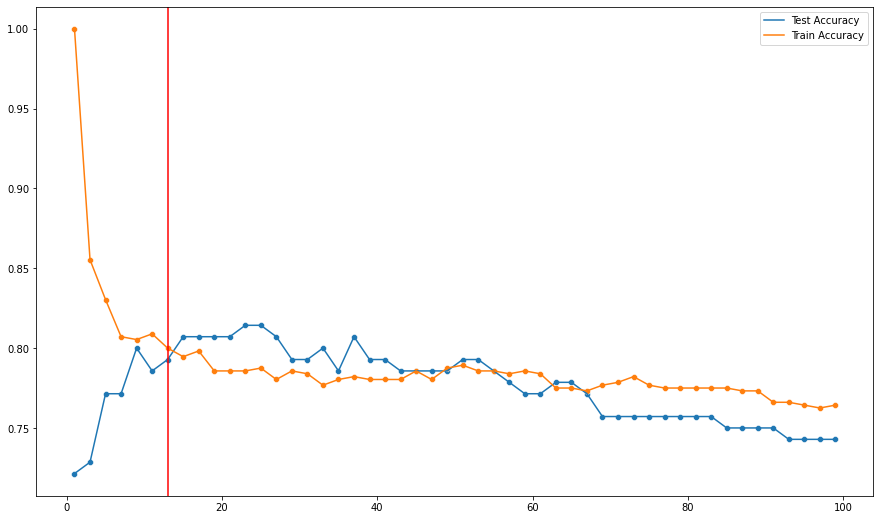

In [26]:
plt.figure(figsize=(15,9))
sns.lineplot(k, testing_accuracies)
sns.scatterplot(k, testing_accuracies)
sns.lineplot(k, train_accuracies)
sns.scatterplot(k, train_accuracies)
plt.axvline(13, c = 'r')
plt.legend(['Test Accuracy', 'Train Accuracy'], fontsize = 10)
plt.show()

In [17]:
print('Best K : ', best_k)
print('Accuracy : ', round(score*100,2))

Best K :  23
Accuracy :  81.43


# Summary Bank Loan with KNN
1. Best factor K for this case is 23 with 81.43% accuracy score
2. For K = 1, KNN method achieve 100% accuracy in training but very bad accuracy near to 0 in test dataset

# Underfitting and Overfitting : Decission Tree
## Dataset : Bank Loan

# Selection Process of Maximum Depth

In [34]:
depths = range(1,25)
testing_accuracies_tree = []
train_accuracies_tree = []
score = 0

for i in depths :
    tree = DecisionTreeClassifier(
        criterion = 'gini',
        max_depth = i)
    tree.fit(X_train, Y_train)

    y_predict_train_tree = tree.predict(X_train)
    train_accuracies_tree.append(accuracy_score(Y_train, y_predict_train_tree))

    y_predict_test_tree = tree.predict(X_test)
    acc_score = accuracy_score(Y_test, y_predict_test_tree)
    testing_accuracies_tree.append(acc_score)

    if score < acc_score :
        score = acc_score
        best_depth = i

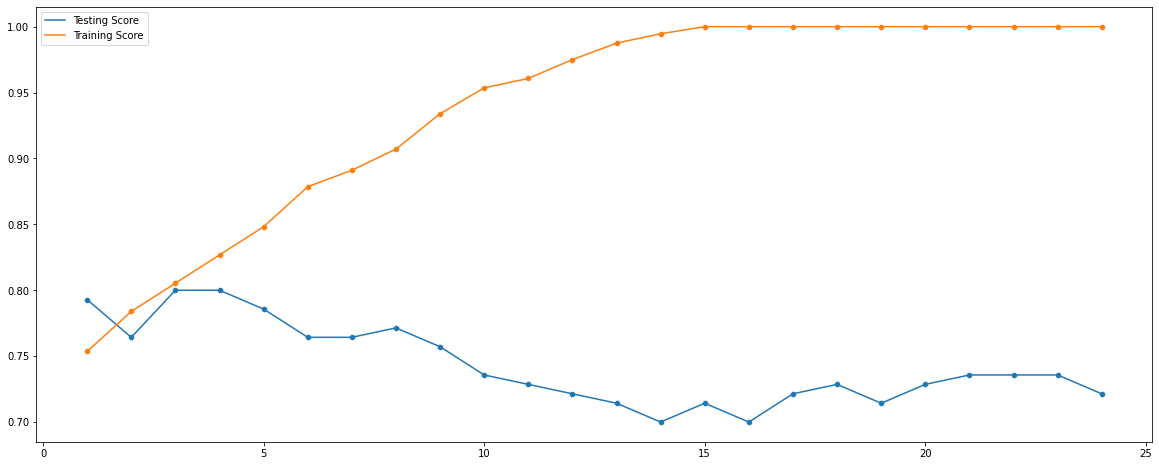

In [36]:
plt.figure(figsize = (20,8))
sns.lineplot(depths, testing_accuracies_tree)
sns.scatterplot(depths, testing_accuracies_tree)
sns.lineplot(depths, train_accuracies_tree)
sns.scatterplot(depths, train_accuracies_tree)
plt.legend(['Testing Score', 'Training Score'])

In [37]:
print('Best Depth : ', best_depth)
print('Accuracy : ', round(score*100,2))

Best Depth :  3
Accuracy :  80.0


# Summary 
1. Best max dept for this case is 3 with 80% accuracy
2. The deeper the depth of the tree, the ML method is getting overfit

# Model Complexity : Linear Model Regression 
## Data : Boston House Price (Scikit Learn)

In [2]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
X = pd.DataFrame(data = boston['data'], columns=boston ['feature_names'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
y = pd.Series(boston['target'])

# Data Splitting

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=123
)

# RIDGE REGRESSION

In [8]:
alpha = [100000,10000,1000,100,10,1,0.1,0.01,0.001,0.8]
testing_mse = []
training_mse = []
score = 0

for i in alpha:
    ridgereg = Ridge(alpha = i)
    ridgereg.fit(X_train, y_train)

    y_predict_train = ridgereg.predict(X_train)
    training_mse.append(mean_squared_error(y_train, y_predict_train ))

    y_predict_test = ridgereg.predict(X_test)
    mse_score = mean_squared_error(y_test, y_predict_test)
    testing_mse.append(mse_score)

    if score > -mse_score :
        score = mse_score
        best_alpha = i

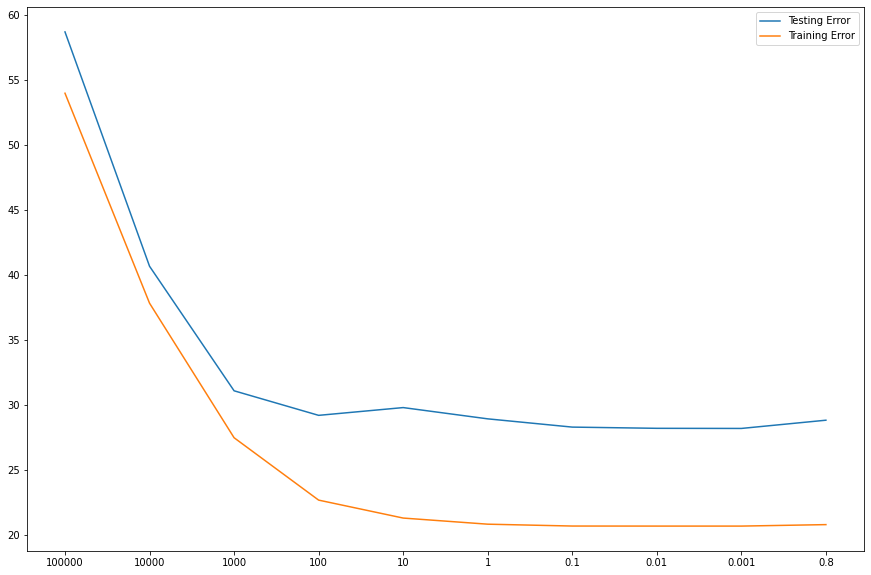

In [9]:
length = range(len(alpha))

plt.figure(figsize=(15,10))
sns.lineplot(length, testing_mse)
sns.lineplot(length, training_mse)
plt.legend(['Testing Error','Training Error'])
plt.xticks(length,alpha)
plt.show()

In [10]:
print('best_alpha : ',best_alpha)
print("MSE : ",score)

best_alpha :  0.8
MSE :  28.827684635070554


In [11]:
# Predict New Data

In [12]:
new_ridgereg = Ridge(alpha = best_alpha)
new_ridgereg.fit(X_train, y_train)

Ridge(alpha=0.8)

In [13]:
pred_test = new_ridgereg.predict(X_test)
pred_test

array([15.48264342, 27.68841079, 38.95589987, 17.98331378, 30.55178284,
       38.07470226, 25.44143937, 10.08809882, 14.14838963, 31.92282856,
       28.7001441 , 19.56307014, 13.79523696, 31.17360188, 16.92447097,
       21.33788143, 20.70926077, 37.85471957, 18.16426203, 15.25212713,
       13.83283745, 24.28036736, 32.96859328, 39.07546589, 31.11744187,
       22.28847523, 17.97440344, 21.06178904, 23.4370449 , 20.23012811,
       25.86697121, 33.9111703 , 15.2252018 , 21.86943915, 23.61548164,
       34.86696229, 29.09641   , 18.64830384, 14.01154767, 38.06009424,
       30.94180514, 18.6394446 , 19.55090753, 39.91845769,  7.65948531,
       27.05849654, 19.70945428, 25.5873632 , 15.64522968, 25.90503957,
       34.61444395, 24.16408064, 20.03523274, 12.49111695, 24.02903105,
       18.34529012, 10.71574332,  2.28570701, 32.0861609 , 13.70661085,
       20.18935506, 22.85453287, 21.04507118, 18.0875957 , 24.78945062,
       26.91015812, 25.93973498, 21.66294633, 24.51397383, 30.26

In [14]:
banding = pd.DataFrame()
banding['Nilai Real'] = y_test
banding['Nilai Prediksi'] = pred_test
banding['Selisih'] = abs(banding['Nilai Real'] - banding['Nilai Prediksi'])

In [40]:
banding

,Nilai Real,Nilai Prediksi,Selisih
410,15.0,15.482643,0.482643
85,26.6,27.688411,1.088411
280,45.4,38.955900,6.444100
422,20.8,17.983314,2.816686
199,34.9,30.551783,4.348217
...,...,...,...
229,31.5,31.375208,0.124792
159,23.3,27.830778,4.530778
196,33.3,36.180726,2.880726
345,17.5,16.644482,0.855518


# Feature Coef

In [15]:
coef_ridge_reg = pd.DataFrame({
    'Feature Names' : list(X),
    'Feature Coef' : new_ridgereg.coef_
})
coef_ridge_reg

,Feature Names,Feature Coef
0,CRIM,-0.096457
1,ZN,0.047827
2,INDUS,0.042342
3,CHAS,1.113250
4,NOX,-9.380532
5,RM,4.378791
6,AGE,-0.006754
7,DIS,-1.277792
8,RAD,0.269251
9,TAX,-0.013218


# Lasso Regression 

In [16]:
alpha = [100000,10000,1000,100,10,1,0.1,0.01,0.001,0.8]
testing_mse = []
training_mse = []
score = 0

for i in alpha:
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(X_train, y_train)

    y_predict_train = lassoreg.predict(X_train)
    training_mse.append(mean_squared_error(y_train, y_predict_train ))

    y_predict_test = lassoreg.predict(X_test)
    mse_score = mean_squared_error(y_test, y_predict_test)
    testing_mse.append(mse_score)

    if score > -mse_score :
        score = mse_score
        best_alpha = i

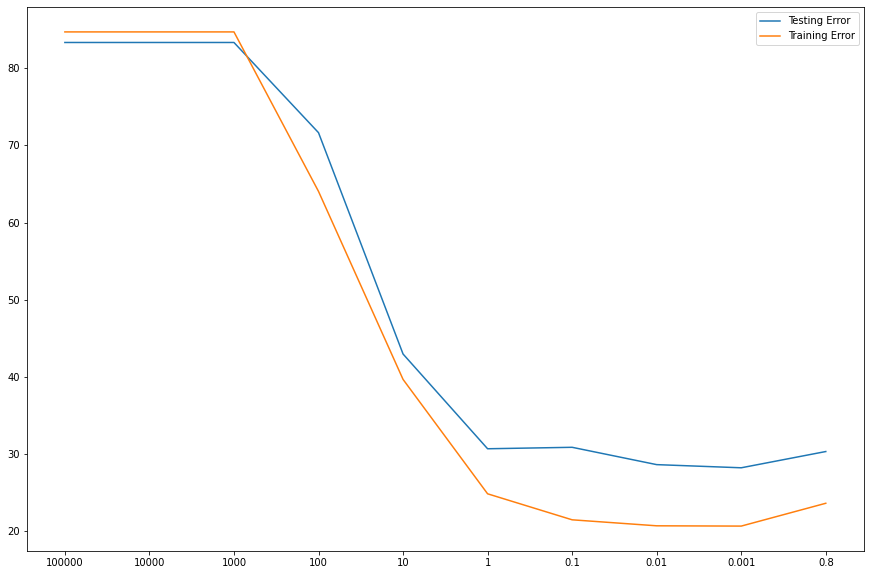

In [17]:
length = range(len(alpha))

plt.figure(figsize=(15,10))
sns.lineplot(length, testing_mse)
sns.lineplot(length, training_mse)
plt.legend(['Testing Error','Training Error'])
plt.xticks(length,alpha)
plt.show()

In [18]:
print('best_alpha : ',best_alpha)
print("MSE : ",score)

best_alpha :  0.8
MSE :  30.339915101533233


# Latihan 1 : 
1. Silahkan buat dataframe dimana terdapat 2 variable, berilah nama X dan Y. Kedua variable tersebut berisikan : 
    - X : nilai urut dari 1-20 
    - Y : nilai urut dari 1-20 + bangkitan data random sebanyak 20 

2. Dari dataframe yang dibuat tersebut, silahkan buat model regresi dengan ketentuan : 
    - model regresi pertama itu menggunakan 80% data yang diambil secara acak 
    - model regresi kedua menggunakan hanya 5 data pertama saja 
3. Gunakan LinearRegression dari sklearn untuk membuat model 
4. Silahkan predict nilai X awal dengan menggunakan kedua model regresi yang dibentuk
5. Buatlah dataframe baru yang memperlihatkan square error dari kedua model tersebut
6. Apakah terjadi overfitting dari model regresi yang dibuat. Jika ya, alasannya kenapa?
7. Jika terjadi overfitting, coba gunakan ridge dan lasso untuk meminimalisir errornya dengan cara mendapatkan alpha yang optimum
8. tentukan ridge dan lasso, yang mana yang memiliki MSE terkecil
9. Lakukan predict dari model yang memiliki MSE terkecil dengan menggunakan data X awal


In [112]:
X = np.arange(1,21)
Y = np.arange(1,21) + np.random.randn(20)
data = pd.DataFrame(zip(X,Y),columns=['X','Y'])
data

,X,Y
0,1,-1.671805
1,2,1.838333
2,3,2.382736
3,4,4.156298
4,5,4.412168
5,6,4.272324
6,7,7.934313
7,8,8.412774
8,9,9.545767
9,10,9.624295


### model 1

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(
    data[['X']],
    Y,
    train_size=0.8,
    random_state=123
)

In [114]:
lr1 = LinearRegression().fit(X_train,Y_train)
lr1

LinearRegression()

In [115]:
pred_test = lr1.predict(data[['X']])
pred_test

array([ 0.52948825,  1.57109708,  2.61270592,  3.65431475,  4.69592358,
        5.73753242,  6.77914125,  7.82075008,  8.86235892,  9.90396775,
       10.94557658, 11.98718542, 13.02879425, 14.07040308, 15.11201191,
       16.15362075, 17.19522958, 18.23683841, 19.27844725, 20.32005608])

In [123]:
banding1 = pd.DataFrame()
banding1['Nilai Real'] = Y
banding1['Nilai Prediksi'] = pred_test
banding1['Selisih'] = ((banding1['Nilai Real'] - banding1['Nilai Prediksi'])**2)
banding1

,Nilai Real,Nilai Prediksi,Selisih
0,-1.671805,0.529488,4.845694
1,1.838333,1.571097,0.071415
2,2.382736,2.612706,0.052886
3,4.156298,3.654315,0.251987
4,4.412168,4.695924,0.080517
5,4.272324,5.737532,2.146836
6,7.934313,6.779141,1.334421
7,8.412774,7.820750,0.350492
8,9.545767,8.862359,0.467046
9,9.624295,9.903968,0.078217


### model 2

In [124]:
x = data[['X']][:5]
y = Y[:5]

In [125]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    train_size=0.8,
    random_state=123
)

In [126]:
lr2 = LinearRegression().fit(x_train,y_train)
lr2

LinearRegression()

In [127]:
pred_test = lr2.predict(data[['X']])
pred_test

array([-1.28128135,  0.31922099,  1.91972333,  3.52022567,  5.12072801,
        6.72123035,  8.32173269,  9.92223503, 11.52273737, 13.12323971,
       14.72374205, 16.32424439, 17.92474673, 19.52524907, 21.12575141,
       22.72625375, 24.32675609, 25.92725843, 27.52776077, 29.12826311])

In [128]:
x = (8.028996-6.153706)**2
x

3.5167125840999987

In [129]:
banding2 = pd.DataFrame()
banding2['Nilai Real'] = Y
banding2['Nilai Prediksi'] = pred_test
banding2['Selisih'] = (banding2['Nilai Real'] - banding2['Nilai Prediksi'])**2
banding2

,Nilai Real,Nilai Prediksi,Selisih
0,-1.671805,-1.281281,0.152509
1,1.838333,0.319221,2.307703
2,2.382736,1.919723,0.214380
3,4.156298,3.520226,0.404587
4,4.412168,5.120728,0.502057
5,4.272324,6.721230,5.997142
6,7.934313,8.321733,0.150094
7,8.412774,9.922235,2.278474
8,9.545767,11.522737,3.908413
9,9.624295,13.123240,12.242615


## Ridge

In [130]:
alpha = [100000,10000,1000,100,10,1,0.1,0.01,0.001,0.8]
testing_mse = []
training_mse = []
score = 0

for i in alpha:
    ridgereg = Ridge(alpha = i)
    ridgereg.fit(X_train, Y_train)

    Y_predict_train = ridgereg.predict(X_train)
    training_mse.append(mean_squared_error(Y_train, Y_predict_train ))

    Y_predict_test = ridgereg.predict(X_test)
    mse_score = mean_squared_error(Y_test, Y_predict_test)
    testing_mse.append(mse_score)

    if score > -mse_score :
        score = mse_score
        best_alpha = i

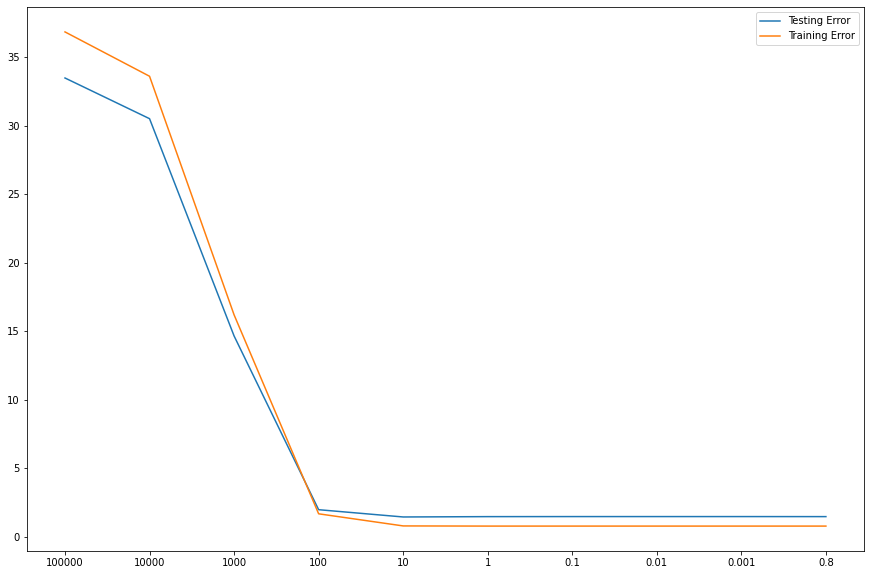

In [131]:
length = range(len(alpha))

plt.figure(figsize=(15,10))
sns.lineplot(length, testing_mse)
sns.lineplot(length, training_mse)
plt.legend(['Testing Error','Training Error'])
plt.xticks(length,alpha)
plt.show()

In [132]:
print('best_alpha : ',best_alpha)
print("MSE : ",score)

best_alpha :  0.8
MSE :  1.481577288967451


In [133]:
new_ridgereg = Ridge(alpha = best_alpha)
new_ridgereg.fit(X_train, Y_train)

Ridge(alpha=0.8)

In [134]:
pred_test = new_ridgereg.predict(data[['X']])
pred_test

array([ 0.54399399,  1.58405554,  2.6241171 ,  3.66417865,  4.70424021,
        5.74430176,  6.78436332,  7.82442487,  8.86448642,  9.90454798,
       10.94460953, 11.98467109, 13.02473264, 14.0647942 , 15.10485575,
       16.1449173 , 17.18497886, 18.22504041, 19.26510197, 20.30516352])

In [136]:
banding3 = pd.DataFrame()
banding3['Nilai Real'] = Y
banding3['Nilai Prediksi'] = pred_test
banding3['Selisih'] = ((banding3['Nilai Real'] - banding3['Nilai Prediksi']))**2
banding3

,Nilai Real,Nilai Prediksi,Selisih
0,-1.671805,0.543994,4.909767
1,1.838333,1.584056,0.064657
2,2.382736,2.624117,0.058265
3,4.156298,3.664179,0.242181
4,4.412168,4.704240,0.085306
5,4.272324,5.744302,2.166718
6,7.934313,6.784363,1.322383
7,8.412774,7.824425,0.346154
8,9.545767,8.864486,0.464143
9,9.624295,9.904548,0.078542


# Lasso Regression 

In [137]:
alpha = [100000,10000,1000,100,10,1,0.8,0.1,0.01,0.001, 100]
testing_mse = []
training_mse = []
score = 0

for i in alpha:
    Lassoreg = Lasso(alpha = i)
    Lassoreg.fit(X_train, Y_train)

    Y_predict_train = Lassoreg.predict(X_train)
    training_mse.append(mean_squared_error(Y_train, Y_predict_train ))

    Y_predict_test = Lassoreg.predict(X_test)
    mse_score = mean_squared_error(Y_test, Y_predict_test)
    testing_mse.append(mse_score)

    if score > -mse_score :
        score = mse_score
        best_alpha = i

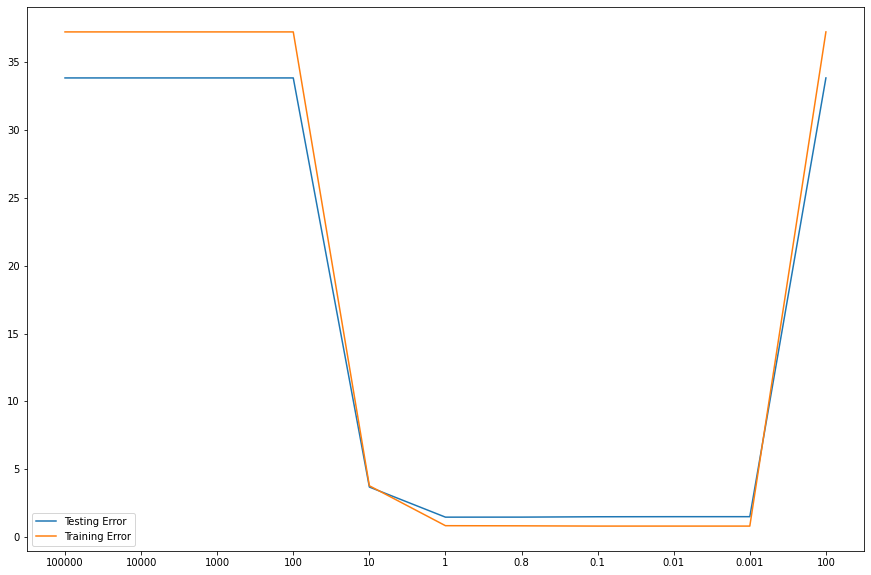

In [138]:
length = range(len(alpha))

plt.figure(figsize=(15,10))
sns.lineplot(length, testing_mse)
sns.lineplot(length, training_mse)
plt.legend(['Testing Error','Training Error'])
plt.xticks(length,alpha)
plt.show()

In [139]:
print('best_alpha : ',best_alpha)
print("MSE : ",score)

best_alpha :  100
MSE :  33.858553173401795


<AxesSubplot:xlabel='X', ylabel='Nilai Prediksi'>

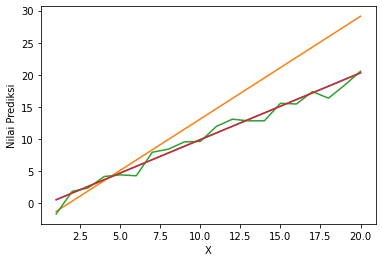

In [140]:
sns.lineplot(data['X'],banding1['Nilai Prediksi'])
sns.lineplot(data['X'],banding2['Nilai Prediksi'])
sns.lineplot(data['X'],banding1['Nilai Real'])
sns.lineplot(data['X'],banding3['Nilai Prediksi'])